In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
df = sns.load_dataset('tips')

# Elektrauto AG

**HWR Berlin, Wintersemester 2023-2024**

*Solene Gastaud, Malte Hein & Carina Thren*

# Teil 1: Jahresbericht an CEO

# Resultate 2023



**Umsatz**: 9 8228 619.38 Euro

**Verkaufte Autos**: 1104

# Umsatz pro Bundesland

**Starker Vertrieb in Sued- & Westdeutschland**

Soll hier der Vertriebsfokus angepasst werden?

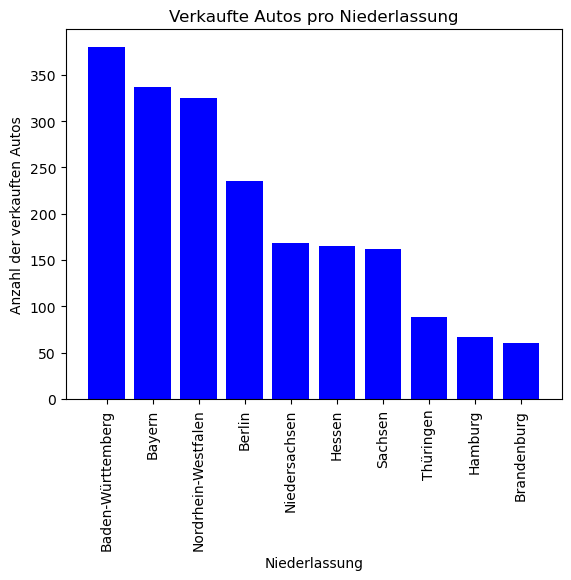

In [20]:
niederlassungen = ['Baden-Württemberg', 'Bayern', 'Nordrhein-Westfalen', 'Berlin', 'Niedersachsen', 'Hessen', 'Sachsen', 'Thüringen', 'Hamburg', 'Brandenburg']
verkaufte_autos = [380, 337, 325, 235, 168, 165, 162, 89, 67, 60]

plt.bar(niederlassungen, verkaufte_autos, color='blue')
plt.xticks(rotation=90, ha='center')

plt.xlabel('Niederlassung')
plt.ylabel('Anzahl der verkauften Autos')
plt.title('Verkaufte Autos pro Niederlassung')

plt.show()

# Geschlechter: Ungleichheit

**Besucher**: 42% weiblich
    
**Kaeufer**: 36% weiblich

*Wie schaffen wir es mehr Frauen von unseren Autos zu begeistern?*

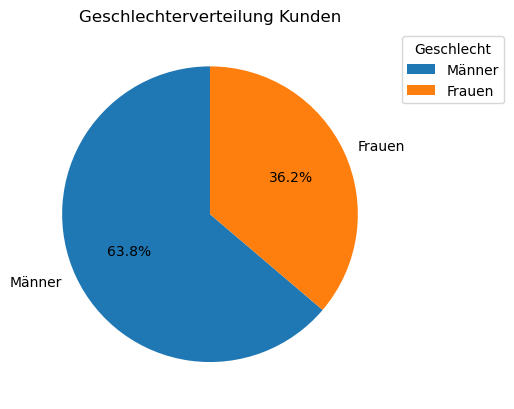

In [21]:
x = [701, 398]
labels = ['Männer', 'Frauen']

plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=90)

plt.legend(title='Geschlecht', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Geschlechterverteilung Kunden')

plt.show()

# Testfahrten

**Durchschnittliche Zeit fuer Testfahrten:**

Minimaler Unterschied zwischen Maennern und Frauen, ABER...

...finale Kaeufer fahren durchschnittlich laenger als Besucher!

*Koennten wir unseren Umsatz steigern, wenn Besuchern mehr Zeit fuer die Testfahrt geschenkt wird?*

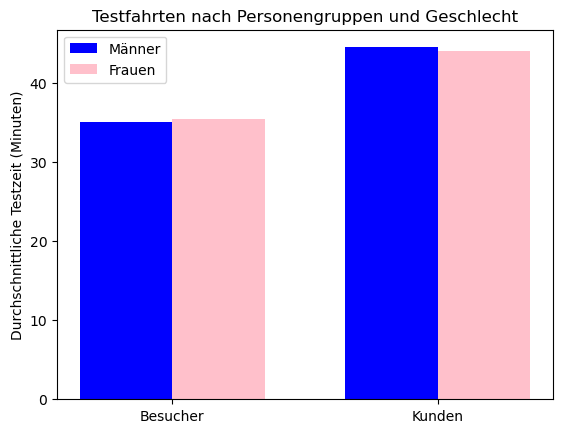

In [22]:
fahrten = ['Besucher', 'Kunden']
durchschnittszeit_männer = [35.02, 44.5]
durchschnittszeit_frauen = [35.37, 44.04]

bar_width = 0.35

index = np.arange(len(fahrten))

fig, ax = plt.subplots()

bar1 = ax.bar(index, durchschnittszeit_männer, bar_width, label='Männer', color='blue')

bar2 = ax.bar(index + bar_width, durchschnittszeit_frauen, bar_width, label='Frauen', color='pink')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(fahrten)

plt.ylabel('Durchschnittliche Testzeit (Minuten)')
plt.title('Testfahrten nach Personengruppen und Geschlecht')

plt.legend()

plt.show()

# Die Rolle des Alters & Einkommens

![Foto1](https://th.bing.com/th/id/OIP.hg52rx7JsgwLK8TMwoBSrgHaHa?w=168&h=180&c=7&r=0&o=5&dpr=2&pid=1.7)

**1. Je hoeher das Einkommen, desto teurer auch das gekaufte Auto**


![Foto2](https://static.vecteezy.com/ti/gratis-vektor/p3/477265-all-age-generation-men-set-vektor.jpg)

**2. Je aelter, desto teurer das gekaufte Auto**

**--> Vertriebsvorschlag: Verkaufspreise fuer bestimmte Modelle senken, um auch mehr Zielgruppen (juenger & geringeres Einkommen) anzusprechen** *(fast alle Kunden nehmen einen Kredit fuer den Autoerwerb auf)*

# Teil 2: Aufgabenbearbeitung - Details

# 1 - Preis
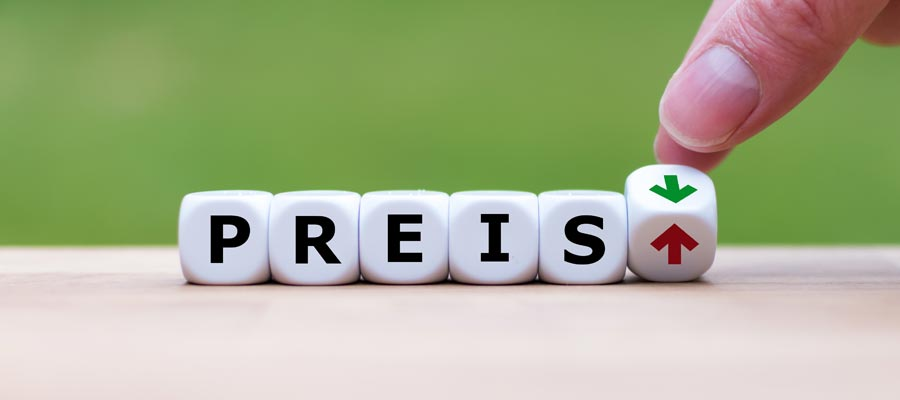

**Durchschnittspreis: 88 889 Euro**


**Hoechstpreis: 165 482 Euro**

**Mindestpreis: 21 471 Euro**

**Unterschied zwischen Hoechst- und Mindestpreis = 144 011 Euro**

Text(0, 0.5, 'Preis in Euro')

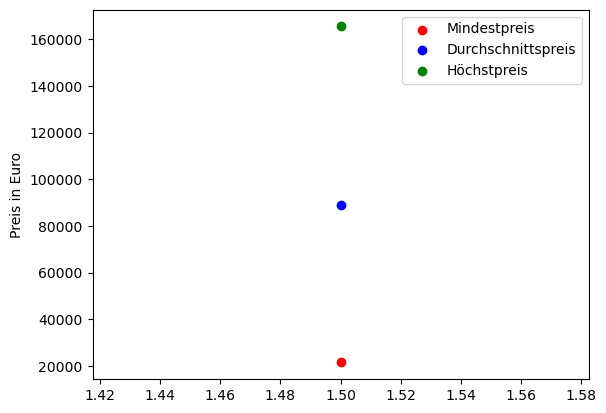

In [23]:
import matplotlib.pyplot as plt

points = [(1.5, 21471, "red", "Mindestpreis"), (1.5, 88889, "blue", "Durchschnittspreis"), (1.5, 165482, "green", "Höchstpreis")]

for point in points:
    x, y, color, label = point
    plt.scatter(x, y, color=color, marker="o", label = label)
    
plt.legend()
plt.ylabel("Preis in Euro")

# 2 - Alter
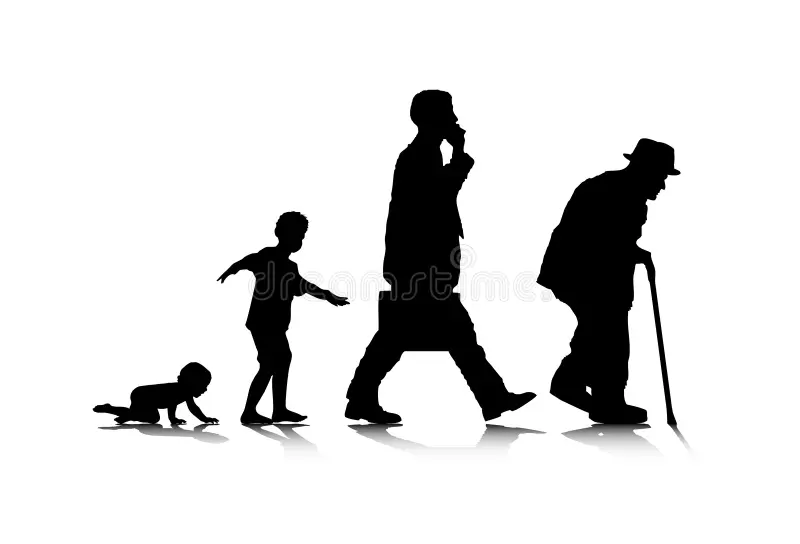

In [24]:
import pandas as pd

data = {
    "Kunden" : [50],
    "Besucher": [49.8],
    "maennliche Kunden": [50.4]
}

df = pd.DataFrame(data)
print(df)


   Kunden  Besucher  maennliche Kunden
0      50      49.8               50.4


*--> fast keine Abweichung zwischen den Alter, alle Kunden und Besucher sind circa 50 Jahre alt*

# 3 - Multiple Linear Regression

**Die soziooekonomischen Merkmale, die den Kaufpreis beeinflussen, sind den Alter, Einkommen und Geschlecht**

**--> Das Einkommen beeinflusst am meisten den Kaufpreis**
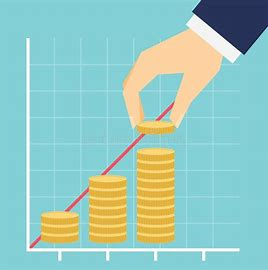


**Mit Alter:**

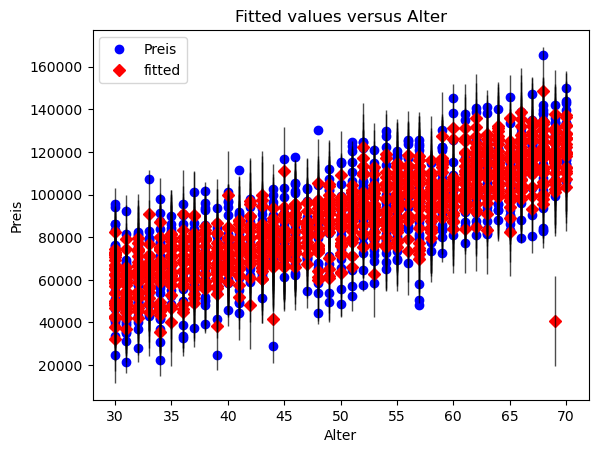

In [25]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import matplotlib.pyplot as plt

kunden_bereinigt_df = pd.read_csv("df_final.csv", sep = ',')

reg = smf.ols("Preis ~ Alter+Einkommen+Geschlecht", data = kunden_bereinigt_df)
resultat_reg = reg.fit()
coef = resultat_reg.params

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(resultat_reg, 1, ax=ax)
plt.show()

**Mit Einkommen:**

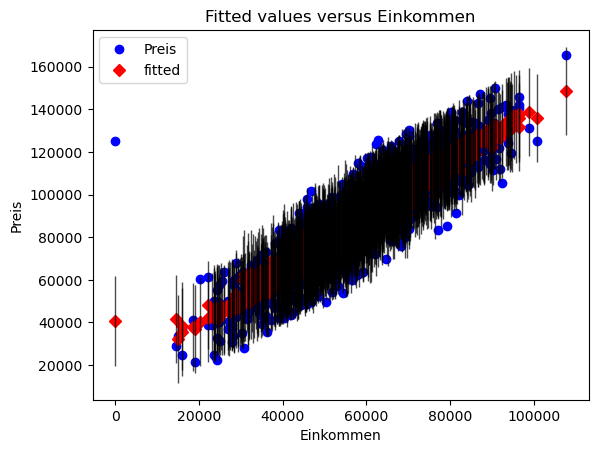

In [26]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(resultat_reg, 2, ax=ax)
plt.show()

**Prognose:**
    

In [27]:
data3 = {
    "Alter" : [32, 51],
    "Einkommen": [30000, 54000],
    "Testzeit": [30, 45],
    "Prognosierter Kaufpreis": [50743, 85259]
}

df = pd.DataFrame(data3)
print(df)

   Alter  Einkommen  Testzeit  Prognosierter Kaufpreis
0     32      30000        30                    50743
1     51      54000        45                    85259


*aeltere Kunde mit mehr Einkommen => teuere Auto*



# 4. Logistische Regression

** Wahrscheinlichkeitsberechnung:**

In [28]:
data2 = {
    "Alter" : [32, 51],
    "Einkommen": [30000, 54000],
    "Testzeit": [30, 45],
    "Warhscheinlichkeit": [0.715339, 0.719300]
}

df = pd.DataFrame(data2)
print(df)

   Alter  Einkommen  Testzeit  Warhscheinlichkeit
0     32      30000        30            0.715339
1     51      54000        45            0.719300


*Groessere Wahrscheinlichkeit fuer Kunde 2, aelter, mit mehr Einkommen und Testzeit*

# 5. Zusammenfuehrung und Bereinigung der Dateien

- Konsistenz der Daten gewaehrleisten --> Datentypen, Trennzeichen der Nachkommastelle standardisiert
- Unsinnige Eintraege --> Identifiziert & geloescht
- "Merge" der Kunden.csv, Besucher.csv und geo.txt Dateien
- Hilfsvariable hinzugefuegt --> Kunden erkennen

# 6. Vorschlaege

I. Mehr Informationen ueber das Fahrzeug (z.B. Marke, Modell) --> Berechnung und Analyse der Profitmargen, Umsatz als auch Gewinnanteile von den einzelnen Modellen 

II. Digitale Umfrage --> mehr Antworten, weniger Fehler 

# Vielen Dank für Ihre Aufmerksamkeit!